# DFT for book example


/home/zinis/playground/academics/dsp_lab/.env/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/zinis/playground/academics/dsp_lab/.env/lib/python3.12/site-packages/numpy/ma/core.py:3448: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/home/zinis/playground/academics/dsp_lab/.env/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


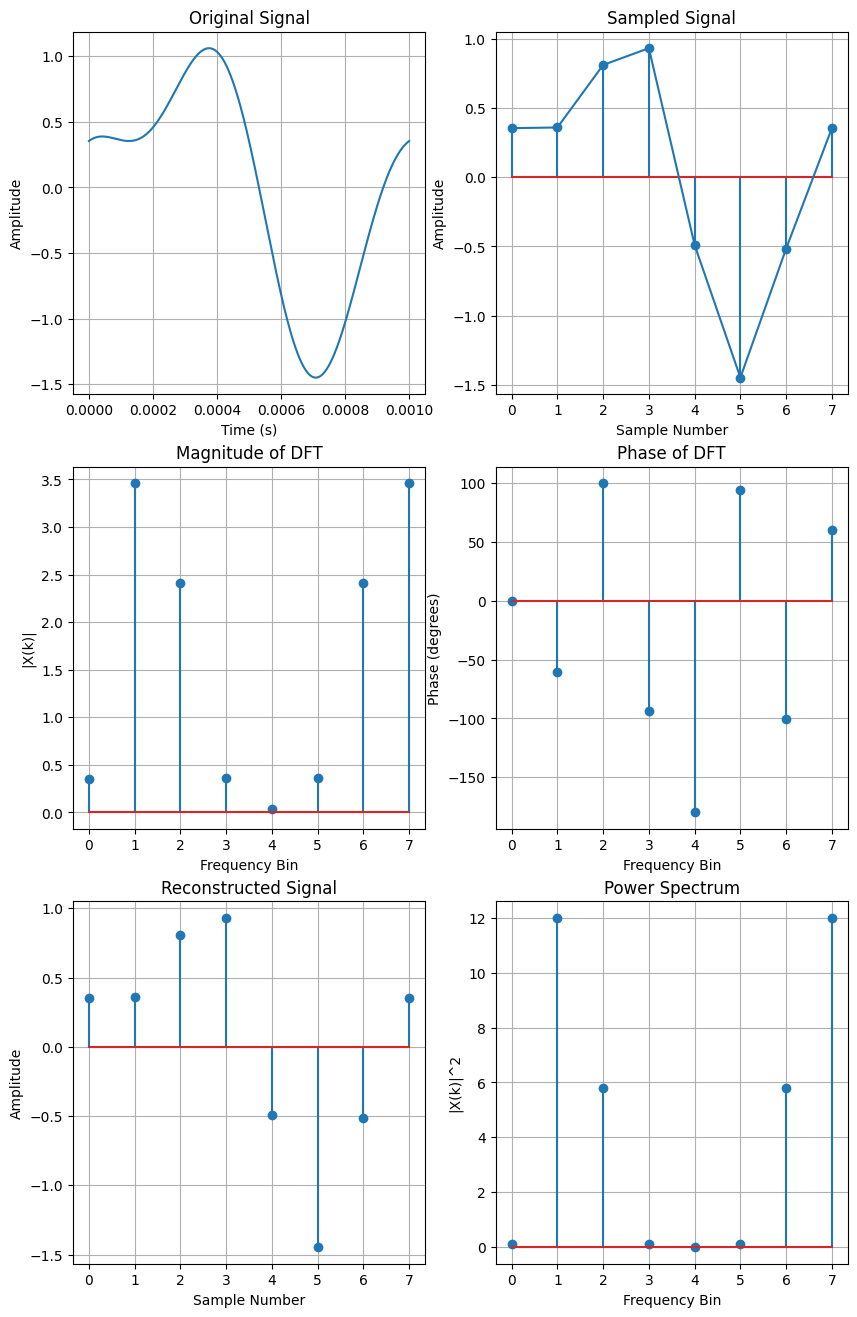

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath


def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)  # Output array with complex numbers
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X


def idft(X):
    N = len(X)
    x_reconstructed = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x_reconstructed[n] += X[k] * np.exp(2j * np.pi * k * n / N)
        x_reconstructed[n] /= N
    return x_reconstructed


def phase(X_m):
    X_phase = []
    for z in X_m:
        X_phase.append(math.degrees(cmath.phase(z)))

    return X_phase


N = 8
sampling_rate = 8000
plt.figure(figsize=(10, 16))

t = np.linspace(0, N / sampling_rate, 500)  # 500 samples between 0 and N/8000
x = np.sin(2 * np.pi * 1000 * t) + 0.5 * np.sin(2 * np.pi * 2000 * t + 3 * np.pi / 4)
plt.subplot(3, 2, 1)
plt.plot(t, x)
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

t = np.linspace(0, N / sampling_rate, N)  # N samples between 0 and N/8000
x = np.sin(2 * np.pi * 1000 * t) + 0.5 * np.sin(2 * np.pi * 2000 * t + 3 * np.pi / 4)
plt.subplot(3, 2, 2)
plt.stem(x)
plt.plot(x)
plt.title("Sampled Signal")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.grid(True)

# X = np.fft.fft(x, N)
# plt.subplot(3, 2, 3)
# plt.stem(np.abs(X))
# plt.title("Magnitude of FFT")
# plt.xlabel("Frequency Bin")
# plt.ylabel("|X(k)|")
# plt.grid(True)

X = dft(x)
plt.subplot(3, 2, 3)
plt.stem(np.abs(X))
plt.title("Magnitude of DFT")
plt.xlabel("Frequency Bin")
plt.ylabel("|X(k)|")
plt.grid(True)

X_phase = phase(X)
plt.subplot(3, 2, 4)
plt.stem(X_phase)
plt.title("Phase of DFT")
plt.xlabel("Frequency Bin")
plt.ylabel("Phase (degrees)")
plt.grid(True)

x_reconstructed = idft(X)
plt.subplot(3, 2, 5)
plt.stem(x_reconstructed)
plt.title("Reconstructed Signal")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(3, 2, 6)
plt.stem(np.abs(dft(x) ** 2))
plt.title("Power Spectrum")
plt.xlabel("Frequency Bin")
plt.ylabel("|X(k)|^2")
plt.grid(True)

plt.show()